<a href="https://colab.research.google.com/github/LoopThrough-i-j/HandWrittenDigitClassification/blob/master/HandWrittenDigitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Statements and Data Processing**





1.   **The images are imported from the Keras datasets**
2.   **Image preprocessing before training**

---


In [0]:
from tensorflow.keras.datasets import mnist #Contains the data set
from tensorflow.keras.models import Sequential #The Type of model Used
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,Activation #The Layers to be used
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np


In [0]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

2


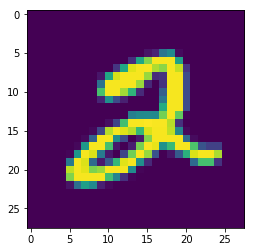

In [0]:
plt.imshow(train_images[5])
print(train_labels[5])

## **The images arrays or matrix are transformed in 2 ways as follows**


1.   Each of the image intensities or matrix values are divided by 255 to get a value between 0 and 1
2.   Each of the intensities above 0.6 now is converted to 1 and other to 0 .which will remove un-necessary noise or feather around the image

---






In [0]:
train_images=train_images/255

2


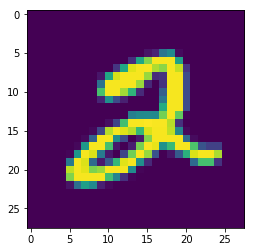

In [0]:
plt.imshow(train_images[5])
print(train_labels[5])

In [0]:
train_images=np.array(train_images)
test_images=np.array(test_images)

In [0]:
test_images=test_images/255

In [0]:
test_images[test_images>=0.6]=1
test_images[test_images<0.6]=0


9


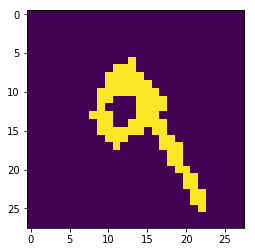

In [0]:
plt.imshow(test_images[7])
print(test_labels[7])

In [0]:
train_images[train_images>=0.6]=1
train_images[train_images<0.6]=0

2


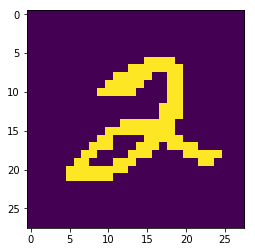

In [0]:
plt.imshow(train_images[5])
print(train_labels[5])

In [0]:
train_images[5].shape

(28, 28)

In [0]:
train_images=train_images.reshape((60000,28,28,1))

In [0]:
test_images=test_images.reshape((10000,28,28,1))

In [0]:
test_images.shape

(10000, 28, 28, 1)

## Creating a Tensorflow model to Classify The images


> The model is a sequential one, made up of convolutional layers and dense layers.



In [0]:
model=Sequential()


model.add(Conv2D(64, (3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation("relu"))

model.add(Conv2D(64, (3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation("relu"))

model.add(Conv2D(64, (3,3), input_shape=(28,28)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation("relu"))

model.add(Flatten())


model.add(Dense(10))
model.add(Activation("sigmoid"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])



In [0]:
model.fit(train_images,train_labels,batch_size=300,epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 65us/sample - loss: 0.5264 - acc: 0.8365
Epoch 2/15
60000/60000 [==============================] - 4s 62us/sample - loss: 0.1444 - acc: 0.9563
Epoch 3/15
60000/60000 [==============================] - 4s 62us/sample - loss: 0.1029 - acc: 0.9689
Epoch 4/15
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0848 - acc: 0.9741
Epoch 5/15
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0729 - acc: 0.9785
Epoch 6/15
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0637 - acc: 0.9804
Epoch 7/15
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0550 - acc: 0.9830
Epoch 8/15
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0502 - acc: 0.9841
Epoch 9/15
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0448 - acc: 0.9863
Epoch 10/15
60000/60000 [==============================] - 

## **Testing The Model And Finding Accuracy**

In [0]:
count=0
outputs=model.predict(np.array(test_images))
for i in range(10000):
    if outputs[i].argmax()==test_labels[i]:
        count+=1
        
Accuracy=count/10000

In [0]:
Accuracy

0.9825